In [1]:
from IPython.display import Image


## Python 数据结构

#### 1. List
三个方法，分别是连接，append，生成器。可以看出，生成器的耗时是最低的。

In [2]:
def test1():
    l = []
    for i in range(1000):
        l = l + [i]
def test2():
    l = []
    for i in range(1000):
        l.append(i)

def test3():
    l = [i for i in range(1000)]
    


from timeit import Timer
t1 = Timer("test1()", "from __main__ import test1")
print("concat ",t1.timeit(number=1000), "milliseconds")
t2 = Timer("test2()", "from __main__ import test2")
print("append ",t2.timeit(number=1000), "milliseconds")
t3 = Timer("test3()", "from __main__ import test3")
print("comprehension ",t3.timeit(number=1000), "milliseconds")

concat  1.3397013563828681 milliseconds
append  0.07760943135980769 milliseconds
comprehension  0.031741314984928826 milliseconds


pop最后一个元素的效率高于pop第一个元素。

In [3]:
x = [i for i in range(2000000)]
pop_zero = Timer("x.pop(0)","from __main__ import x")
print("pop_zero ",pop_zero.timeit(number=1000), "milliseconds")
x = [i for i in range(2000000)]
pop_end = Timer("x.pop()","from __main__ import x")
print("pop_end ",pop_end.timeit(number=1000), "milliseconds")

# ('pop_zero ', 1.9101738929748535, 'milliseconds')
# ('pop_end ', 0.00023603439331054688, 'milliseconds')

pop_zero  3.166961997643142 milliseconds
pop_end  7.853676936697696e-05 milliseconds


Python的list的实现不是类似数据结构中的单链表，而是类似数组，也就是说list中的元素保存在一片连续的内存区域中，这样的话只有知道元素索引就能确定元素的内存位置，从而直接取出该位置上的值，但是它的缺点在于前插需要移动元素，而且随着list中元素的增多需要移动的元素也就越多，花费的时间也就自然多了。而单链表不同，单链表要得到某个位置上的元素必须要从头开始遍历，但是它的插入操作(前插或者后插)基本上都是恒定的时间，与链表中元素的多少没有关系，因为元素之间用“指针”维护着他们的关系。

#### 栈
栈有许多作用。这里先实现一个栈。

In [4]:
class Stack:
    def __init__(self):
        pass
    def is_empty(self):
        pass
    def push(self,item):
        pass
    def pop(self):
        pass
    def peek(self):
        pass
    def size(self):
        pass

这里具体实现这个栈，拿进元素应该是直接append，拿出元素就是直接pop(默认最后一个元素)。

In [5]:
class Stack:
    def __init__(self):
        self.items = []
    def is_empty(self):
        return self.items == []
    def push(self,item):
        self.items.append(item)
    def pop(self):
        return self.items.pop()
    def peek(self):
        return self.items[len(self.items) - 1]
    def size(self):
        return len(self.items)
    
s = Stack()
print(s.is_empty())
s.push(4)
s.push('dog')
print(s.peek())
s.push(True)
print(s.size())
print(s.is_empty())
s.push(8.4)
print(s.pop())
print(s.pop())
print(s.size())

True
dog
3
False
8.4
True
2


#### 队列
队列也就是先进先出。这里实现一个队列。

In [6]:
class Queue:
    def __init__(self):
        pass
    def is_empty(self):
        pass
    def enqueue(self, item):
        pass
    def dequeue(self):
        pass
    def size(self):
        pass

In [7]:
class Queue:
    def __init__(self):
        self.items = []
    def is_empty(self):
        return self.items == []
    def enqueue(self, item):
        self.items.insert(0, item)
    def dequeue(self):
        return self.items.pop()
    def size(self):
        return len(self.items)
q = Queue()
q.enqueue('hello')
q.enqueue('dog')
print(q.items)
q.enqueue(3)
q.dequeue()
print(q.items)

['dog', 'hello']
[3, 'dog']


#### 二叉树

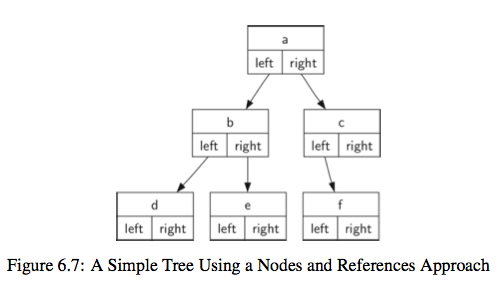

In [8]:
Image('btclass.png')

二叉树的构建其实比较简单，主要是要完成左子节点和右子节点的构架即可。

In [9]:
class BinaryTree:
    def __init__(self):
        pass
    def insert_left(self):
        pass
    def insert_right(self):
        pass
    def get_left_child(self):
        pass
    def get_right_child(self):
        pass
    def set_root_val(self):
        pass
    def get_root_val(self):
        pass

定义好函数之后，我们需要明白，一个二叉树，它至少应该有什么？也就是__init__函数，它至少需要一个跟节点。一个左子节点和一个右子节点。
注意，二叉树的性质是每个根节点其实就是一颗树，所以在插入的时候直接是插入树的对象。
> 或者说，在二叉树里面，只有根节点才是可以获取到具体内容。左节点和右节点全是对象，这样才是二叉树！

In [16]:
class BinaryTree:
    def __init__(self, root):
        self.root = root
        self.left_child = None
        self.right_child = None
    def insert_left(self, new_node):
        if self.left_child == None:
            self.left_child = BinaryTree(new_node)
        else:
            t = BinaryTree(new_node)
            t.left_child = self.left_child
            self.left_child = t
            
    def insert_right(self, new_node):
        if self.right_child == None:
            self.right_child = BinaryTree(new_node)
        else:
            t = BinaryTree(new_node)
            t.right_child = self.right_child
            self.right_child = t
            
    def get_left_child(self):
        return self.left_child
    def get_right_child(self):
        return self.right_child
    def set_root_val(self, root):
        self.root = root
    def get_root_val(self):
        return self.root

test1 = BinaryTree('root')
test1.insert_left('left')
test1.insert_right('right')
test1.get_left_child().get_root_val()

'left'